In [1]:
from matplotlib.pyplot import imread
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize, rescale
from skimage import color
import scipy.signal
from time import time
import os 

%matplotlib inline

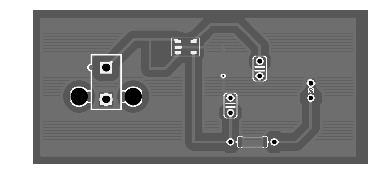

In [6]:
def get_gray_norm_image(path):
    orig_img = imread(path)
    gray_img = color.rgb2gray(orig_img)
    norm_img = gray_img/255.
    return norm_img

img = get_gray_norm_image('./pcb_layers/processed/2-9-top.png')
plt.axis('off')
plt.imshow(img, cmap='gray')

In [7]:
def show_component(h_start=0, h_end=1, w_start=0, w_end=1):
    """
    show component from h_start to h_start, w_start to w_end (input [0, 1])
    """

    plt.axis('off')
    h, w = img.shape
    
    kernel = img[int(h*h_start):int(h*h_end), int(w*w_start):int(w*w_end)]
    plt.imshow(kernel, cmap='gray')
    return kernel

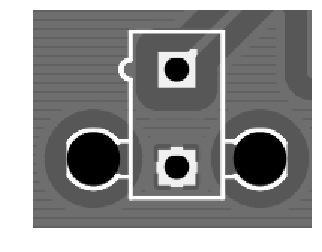

In [17]:
component_0 = show_component(0.25, 0.71, 0.08, 0.35)

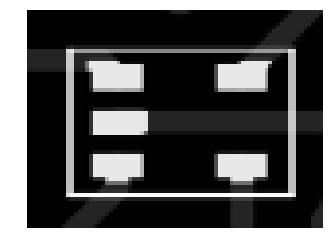

In [24]:
component_1 = show_component(0.15, 0.33, 0.4, 0.51)

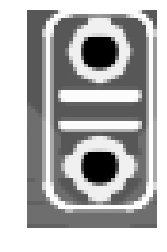

In [38]:
component_2 = show_component(0.3, 0.48, 0.65, 0.7)

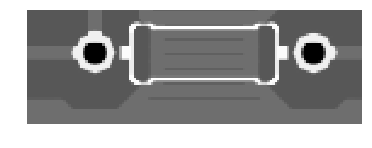

In [47]:
component_3 = show_component(0.8, 0.95, 0.55, 0.75)

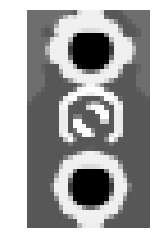

In [55]:
component_4 = show_component(0.45, 0.6, 0.81, 0.85)

In [56]:
def get_detected(img, component):
    """
    input: image and component patch
    output: best_location (left, upper corner) along with a diagram showing the detected image
    """
    start_time = time()
    best_score, res, best_loc = -1, None, None
    for component in [component, component.T]:
        med = np.median(img)
        signed_img = np.where(img > med, 1, -1)
        signed_component = np.where(component > med, 1, -1)
        m1, n1 = signed_img.shape[:2]
        m2, n2 = signed_component.shape[:2]
        convolved = np.zeros(signed_img.shape)
        for i in range(m1-m2):
            for j in range(n1-n2):
                convolved[i, j] = np.sum(signed_img[i:i+m2, j:j+n2]*signed_component)
        loc = np.argmax(convolved.ravel())
        i, j = loc//n1, loc % n1
        matched = np.zeros(img.shape)
        matched[i:i+m2, j:j+n2] = img[i:i+m2, j:j+n2]
        if (convolved.ravel()[loc] > best_score):
            best_score = convolved.ravel()[loc]
            res = matched
            best_loc =loc
            
    print('Get detected: {} seconds elapsed'.format(time()-start_time))
    return (best_loc//n1, best_loc%n1), res

Get detected: 4.7687828540802 seconds elapsed


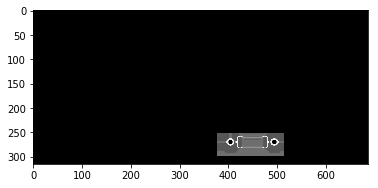

In [57]:
plt.imshow(get_detected(img, component_3)[1], cmap='gray')

In [58]:
image_names = ['./pcb_layers/processed/'+x for x in os.listdir('./pcb_layers/processed') if 'top' in x and 'copper' not in x]
print(image_names)

['./pcb_layers/processed/10-nograde-top.png', './pcb_layers/processed/11-9.5-top.png', './pcb_layers/processed/12-10-top.png', './pcb_layers/processed/13-nograde-top.png', './pcb_layers/processed/14-nograde-top.png', './pcb_layers/processed/15-9-top.png', './pcb_layers/processed/16-nograde-top.png', './pcb_layers/processed/17-9.5-top.png', './pcb_layers/processed/18-nograde-top.png', './pcb_layers/processed/19-10-top.png', './pcb_layers/processed/2-9-top.png', './pcb_layers/processed/3-7-top.png', './pcb_layers/processed/4-9-top.png', './pcb_layers/processed/5-9.5-top.png', './pcb_layers/processed/6-nograde-top.png', './pcb_layers/processed/7-10-top.png', './pcb_layers/processed/8-5-top.png', './pcb_layers/processed/9-nograde-top.png']


Get detected: 7.912026882171631 seconds elapsed
Get detected: 7.502355098724365 seconds elapsed
Get detected: 13.151858568191528 seconds elapsed
Get detected: 12.875461339950562 seconds elapsed
Get detected: 5.38737416267395 seconds elapsed
Get detected: 9.208954334259033 seconds elapsed
Get detected: 10.606796026229858 seconds elapsed
Get detected: 0.0019800662994384766 seconds elapsed
Get detected: 9.070217370986938 seconds elapsed
Get detected: 5.595907211303711 seconds elapsed
Get detected: 8.538110971450806 seconds elapsed
Get detected: 9.417576789855957 seconds elapsed
Get detected: 6.4322144985198975 seconds elapsed
Get detected: 25.41684627532959 seconds elapsed
Get detected: 22.155705213546753 seconds elapsed
Get detected: 26.331629037857056 seconds elapsed
Get detected: 0.5813286304473877 seconds elapsed
Get detected: 14.512644290924072 seconds elapsed


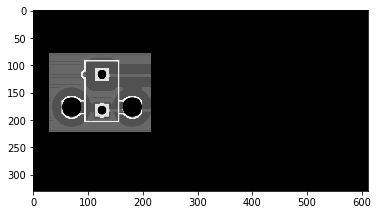

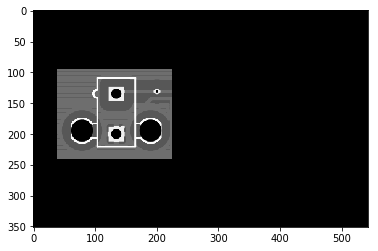

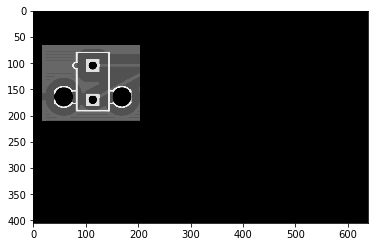

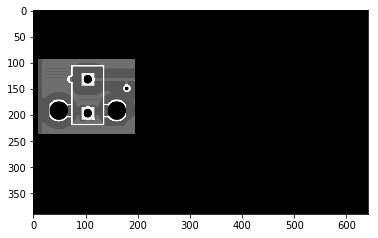

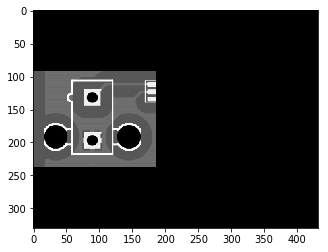

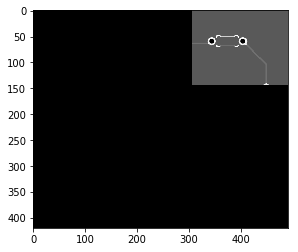

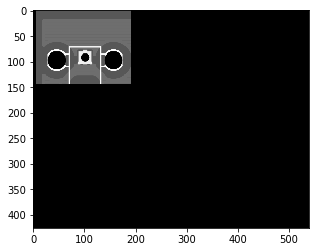

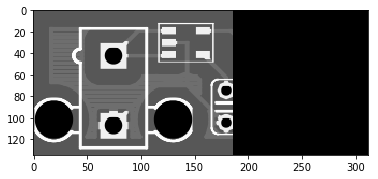

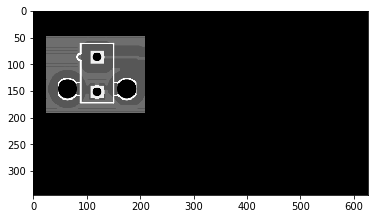

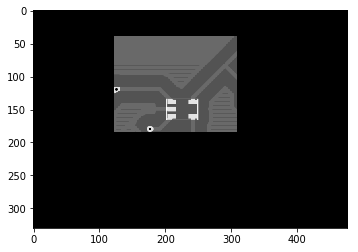

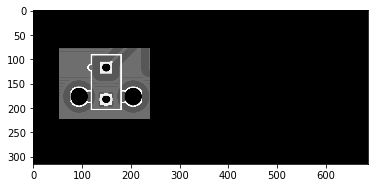

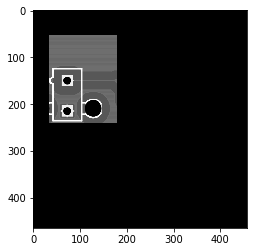

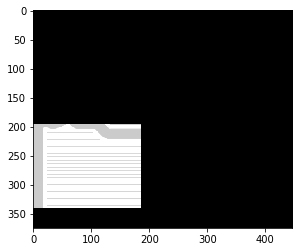

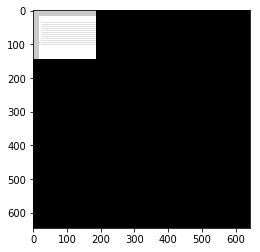

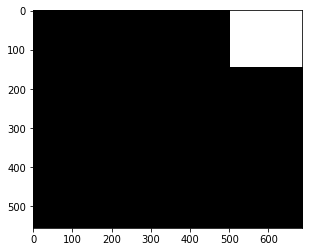

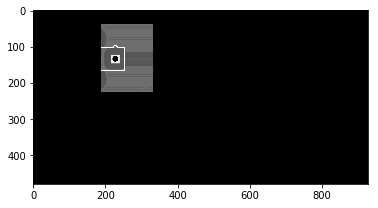

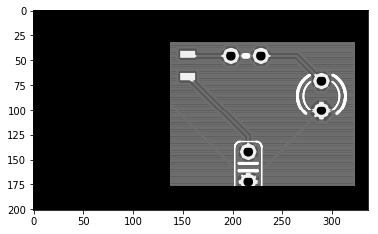

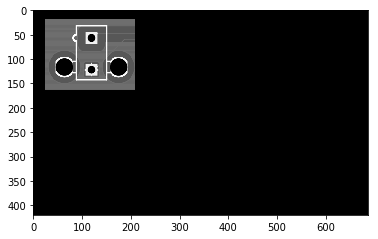

In [60]:
for img_name in image_names:
    img = get_gray_norm_image(img_name)
    plt.figure()
    plt.imshow(get_detected(img, component_0)[1], cmap='gray')

Get detected: 4.6100170612335205 seconds elapsed
Get detected: 4.161798000335693 seconds elapsed
Get detected: 5.833180904388428 seconds elapsed
Get detected: 5.734394311904907 seconds elapsed
Get detected: 2.991581916809082 seconds elapsed
Get detected: 4.644155740737915 seconds elapsed
Get detected: 5.244916915893555 seconds elapsed
Get detected: 0.48533010482788086 seconds elapsed
Get detected: 4.835362672805786 seconds elapsed
Get detected: 3.308889389038086 seconds elapsed
Get detected: 4.673584461212158 seconds elapsed
Get detected: 4.6816651821136475 seconds elapsed
Get detected: 3.625704288482666 seconds elapsed
Get detected: 10.18316125869751 seconds elapsed
Get detected: 10.031458854675293 seconds elapsed
Get detected: 12.463812351226807 seconds elapsed
Get detected: 1.1022436618804932 seconds elapsed
Get detected: 6.884058952331543 seconds elapsed


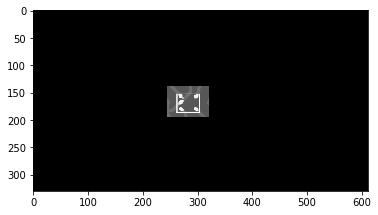

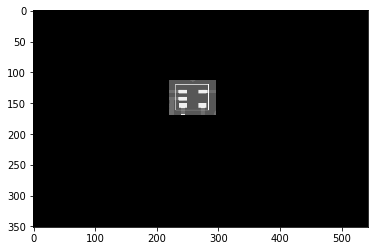

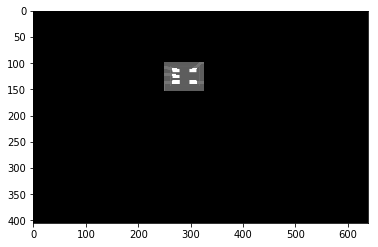

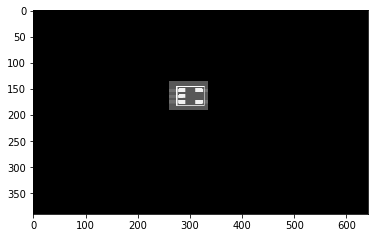

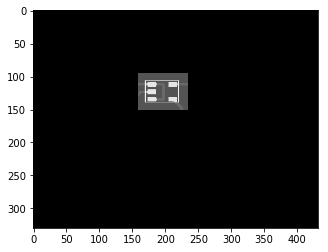

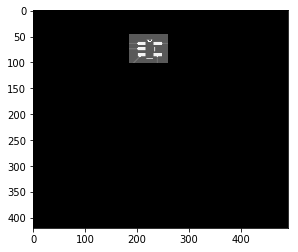

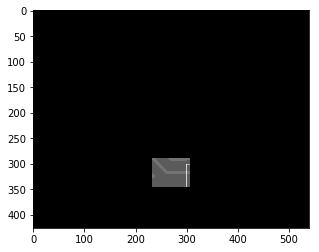

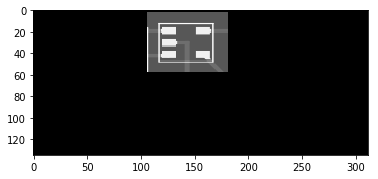

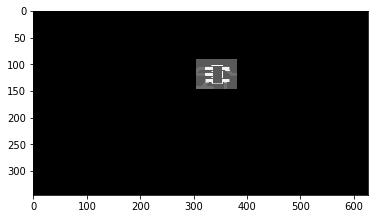

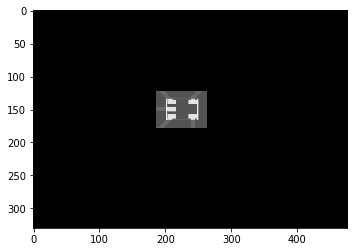

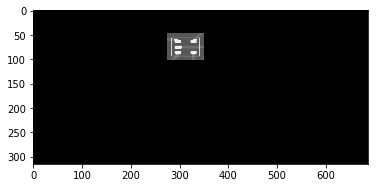

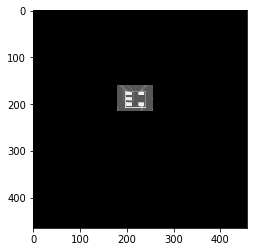

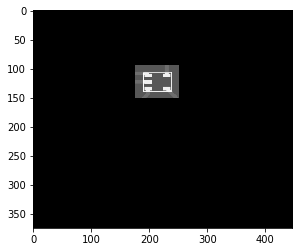

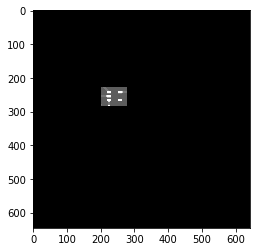

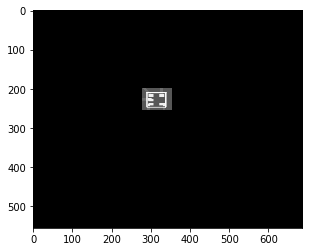

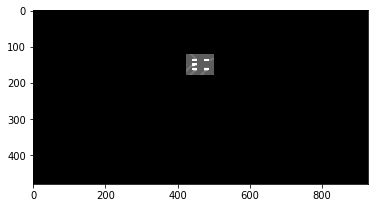

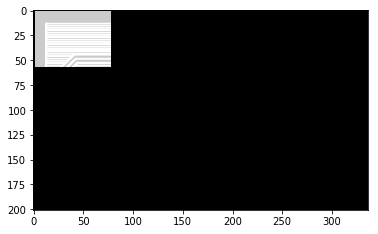

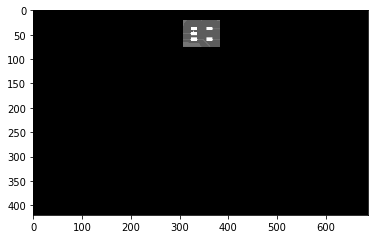

In [61]:
for img_name in image_names:
    img = get_gray_norm_image(img_name)
    plt.figure()
    plt.imshow(get_detected(img, component_1)[1], cmap='gray')

Get detected: 3.4320459365844727 seconds elapsed
Get detected: 3.18219256401062 seconds elapsed
Get detected: 4.493385314941406 seconds elapsed
Get detected: 4.229990005493164 seconds elapsed
Get detected: 2.3428964614868164 seconds elapsed
Get detected: 3.6523759365081787 seconds elapsed
Get detected: 3.9484646320343018 seconds elapsed
Get detected: 0.5037209987640381 seconds elapsed
Get detected: 3.570235252380371 seconds elapsed
Get detected: 2.6559901237487793 seconds elapsed
Get detected: 3.6666202545166016 seconds elapsed
Get detected: 3.6969735622406006 seconds elapsed
Get detected: 2.740710496902466 seconds elapsed
Get detected: 7.6837382316589355 seconds elapsed
Get detected: 7.009226560592651 seconds elapsed
Get detected: 8.034525632858276 seconds elapsed
Get detected: 0.9626622200012207 seconds elapsed
Get detected: 5.126192331314087 seconds elapsed


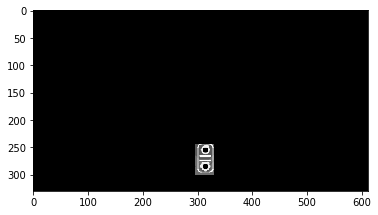

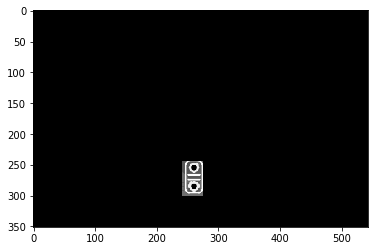

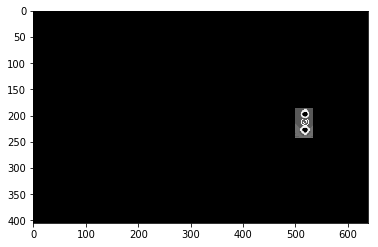

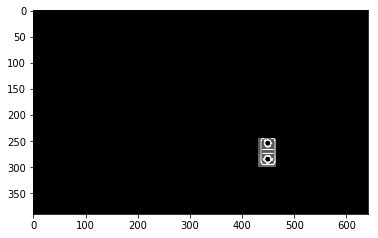

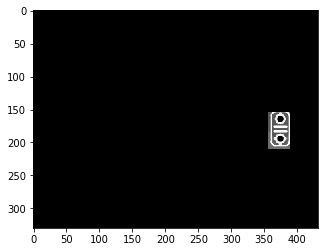

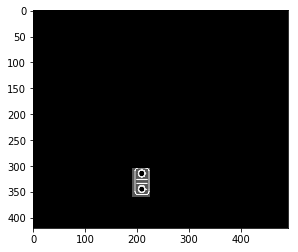

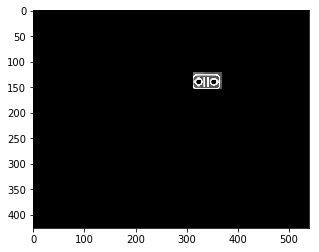

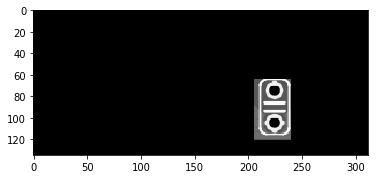

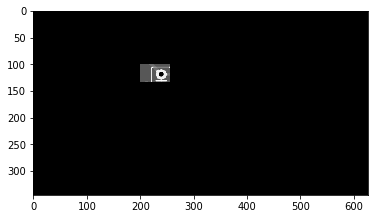

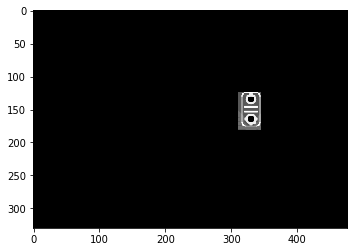

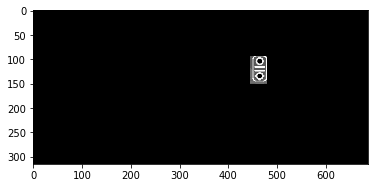

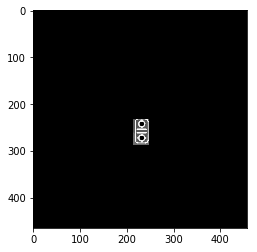

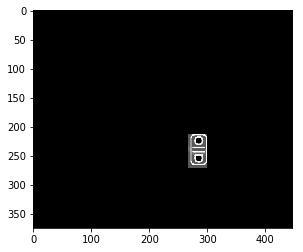

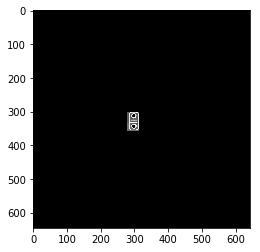

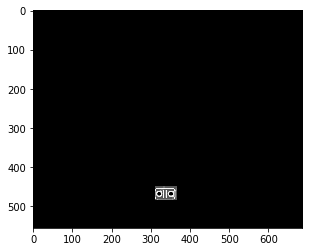

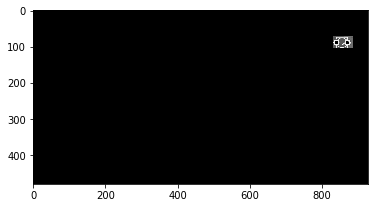

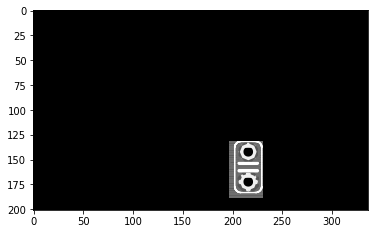

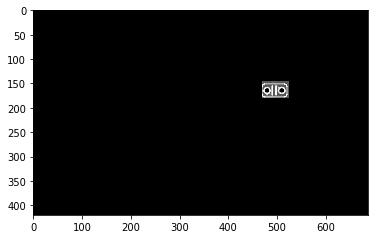

In [62]:
for img_name in image_names:
    img = get_gray_norm_image(img_name)
    plt.figure()
    plt.imshow(get_detected(img, component_2)[1], cmap='gray')

Get detected: 4.703060626983643 seconds elapsed
Get detected: 4.424093723297119 seconds elapsed
Get detected: 6.774145841598511 seconds elapsed
Get detected: 6.51875901222229 seconds elapsed
Get detected: 3.0666165351867676 seconds elapsed
Get detected: 5.1046082973480225 seconds elapsed
Get detected: 5.752816438674927 seconds elapsed
Get detected: 0.2543199062347412 seconds elapsed
Get detected: 5.074548006057739 seconds elapsed
Get detected: 3.471045732498169 seconds elapsed
Get detected: 5.037358045578003 seconds elapsed
Get detected: 5.226895809173584 seconds elapsed
Get detected: 3.834252119064331 seconds elapsed
Get detected: 11.858454704284668 seconds elapsed
Get detected: 10.782885789871216 seconds elapsed
Get detected: 12.49504280090332 seconds elapsed
Get detected: 0.8916497230529785 seconds elapsed
Get detected: 7.529026746749878 seconds elapsed


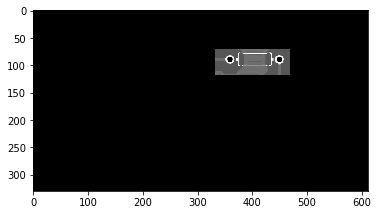

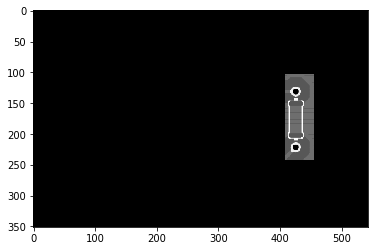

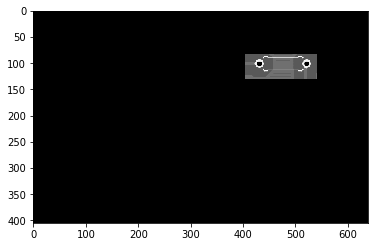

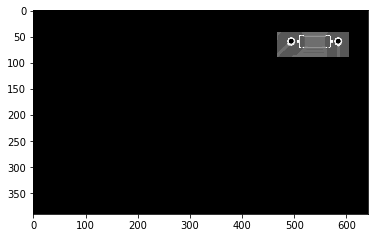

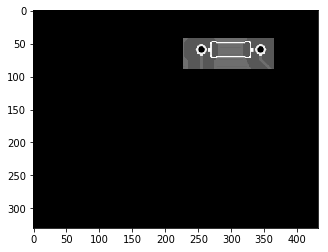

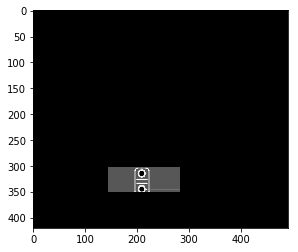

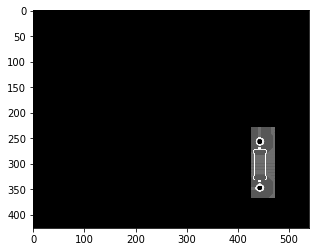

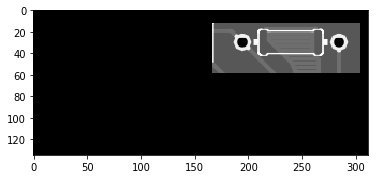

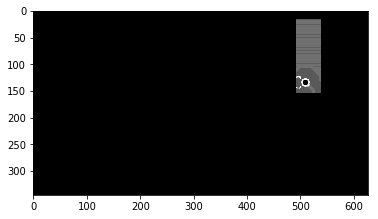

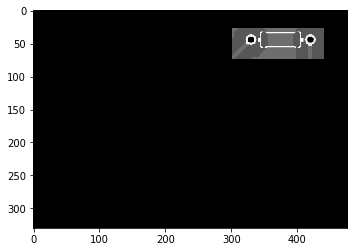

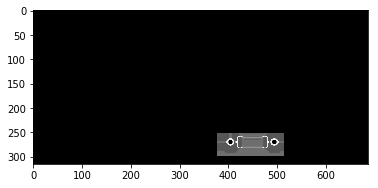

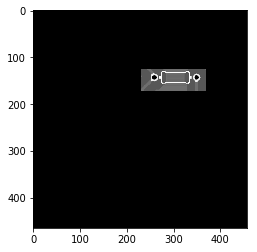

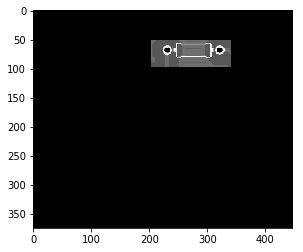

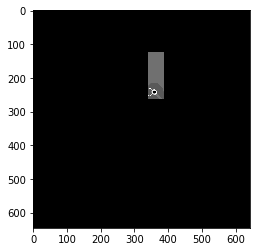

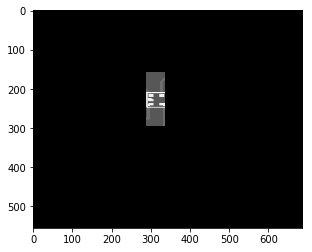

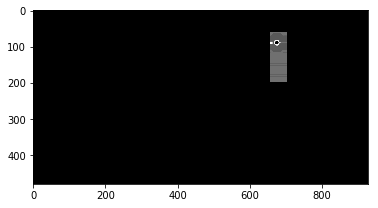

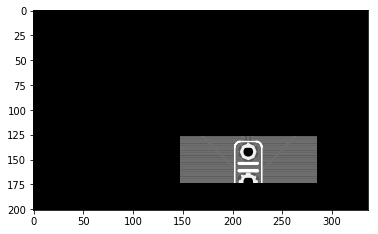

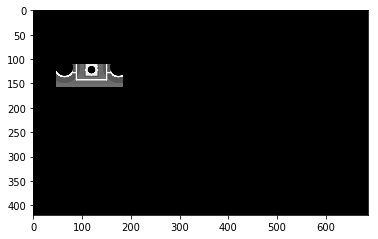

In [63]:
for img_name in image_names:
    img = get_gray_norm_image(img_name)
    plt.figure()
    plt.imshow(get_detected(img, component_3)[1], cmap='gray')

Get detected: 2.809229850769043 seconds elapsed
Get detected: 2.707749843597412 seconds elapsed
Get detected: 3.8536744117736816 seconds elapsed
Get detected: 3.6999993324279785 seconds elapsed
Get detected: 2.0086421966552734 seconds elapsed
Get detected: 2.9114670753479004 seconds elapsed
Get detected: 3.260629892349243 seconds elapsed
Get detected: 0.4767732620239258 seconds elapsed
Get detected: 3.1148221492767334 seconds elapsed
Get detected: 2.2230591773986816 seconds elapsed
Get detected: 3.109370470046997 seconds elapsed
Get detected: 3.141416072845459 seconds elapsed
Get detected: 2.374561071395874 seconds elapsed
Get detected: 6.296316623687744 seconds elapsed
Get detected: 5.595139026641846 seconds elapsed
Get detected: 7.458537817001343 seconds elapsed
Get detected: 0.8144474029541016 seconds elapsed
Get detected: 4.131078004837036 seconds elapsed


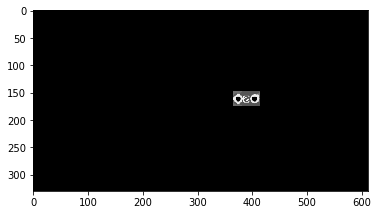

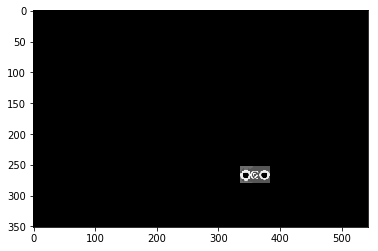

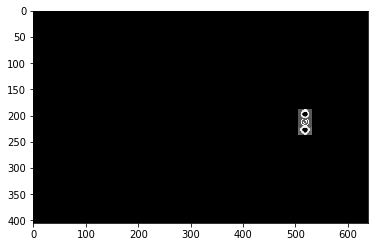

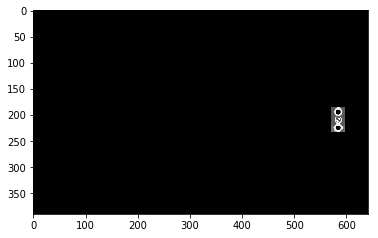

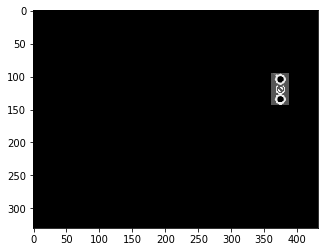

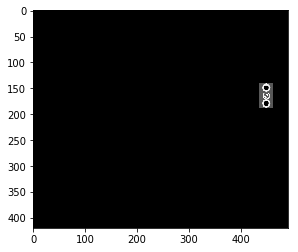

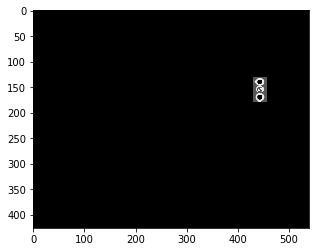

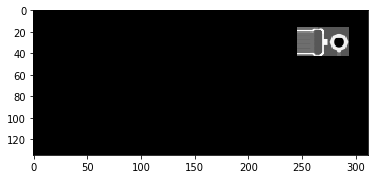

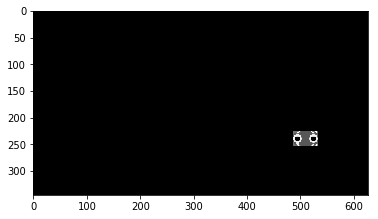

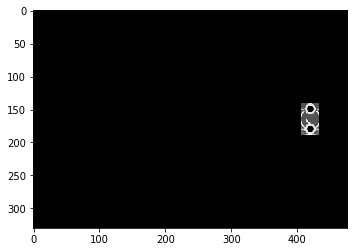

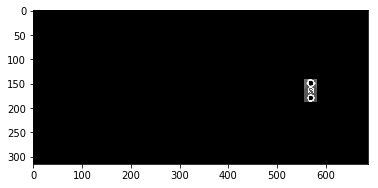

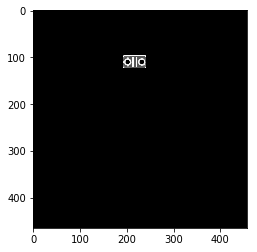

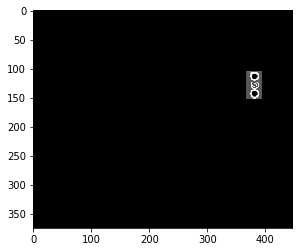

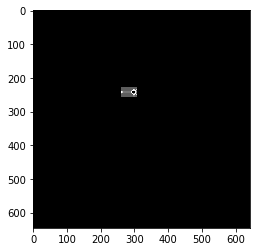

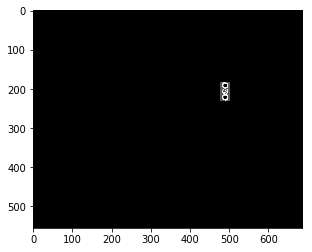

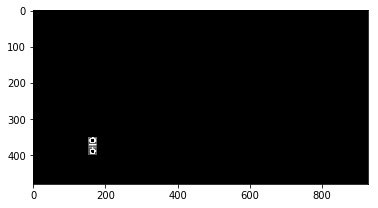

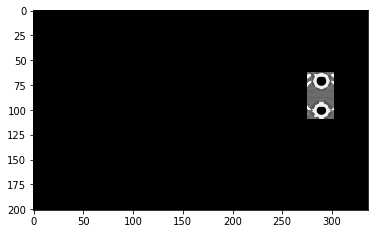

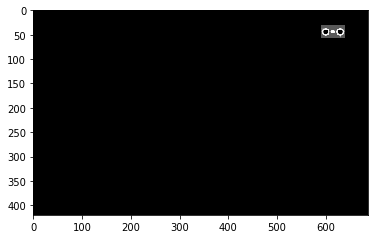

In [64]:
for img_name in image_names:
    img = get_gray_norm_image(img_name)
    plt.figure()
    plt.imshow(get_detected(img, component_4)[1], cmap='gray')